In [1]:
import os
os.getcwd()
import sys
sys.path.append('/home/colin/projects/hedgingbox/')

In [2]:
from hb.preset import Preset

# ma_preset2 = Preset.load_file("var/ma2/ma2.json")
ma_preset1 = Preset.load_file("var/sa/sa_rl1.json")


Current best target function value is:  -6.2236169696754144


In [3]:
ma_preset1._agent.checkpoint_save()

INFO:tensorflow:Assets written to: var/sa/snapshots/policy/assets
INFO:tensorflow:Assets written to: var/sa/snapshots/policy/assets
INFO:tensorflow:Assets written to: var/sa/snapshots/critic/assets
INFO:tensorflow:Assets written to: var/sa/snapshots/critic/assets


In [10]:
import tensorflow as tf
for var in ma_preset1._agent._learner._target_policy_network.trainable_variables:
    print('target', var.name)
    print(var.)

for var in ma_preset1._agent._learner._policy_network.trainable_variables:
    print(var.name)

for var in ma_preset1._agent._learner._target_critic_network.trainable_variables:
    print('target', var.name)

for var in ma_preset1._agent._learner._critic_network.trainable_variables:
    print(var.name)


target RL1/feedforward_mlp_torso/linear/b:0


AttributeError: Tensor.op is meaningless when eager execution is enabled.

In [4]:
sa_agent = ma_preset1._agent
# ma_agent = ma_preset2._agent

In [5]:
import numpy as np
from hb.pricing_engine import blackscholes as bs

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
day = 45
call = True
sigma = 0.3
r = 0.02
q = 0
strike = 100.5
tau = day/360

ss = np.arange(80, 121)
bs_deltas = np.zeros(len(ss), dtype=np.float)
rl1_deltas = np.zeros(len(ss), dtype=np.float)
# rl2_deltas = np.zeros(len(ss), dtype=np.float) 

for i, s in enumerate(ss):
    op = bs.price(call, s, r, q, strike, sigma, tau, tau)
    d = bs.delta(call, s, r, q, strike, sigma, tau, tau)*10
    observation = np.array([s, d, op, tau, 0], dtype=np.float32)
    rl1_deltas[i] = d + sa_agent.select_action(observation)
    # rl2_deltas[i] = d + ma_agent.select_action(observation)
    bs_deltas[i] = d

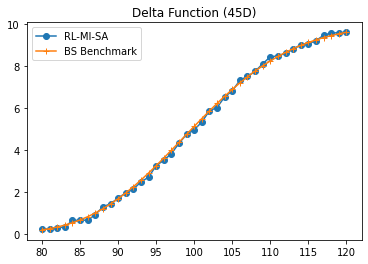

In [7]:
plt.plot(ss, rl1_deltas, marker="o", label="RL-MI-SA")
# plt.plot(ss, rl2_deltas, marker="*", label="RL-MI-MA")
plt.plot(ss, bs_deltas, marker="+", label="BS Benchmark")
plt.title("Delta Function ("+str(day)+"D)")
plt.legend(loc='upper left')

In [1]:
import pandas as pd

In [21]:
loop_log = pd.read_csv("rlagent/logs/environment_loop/logs.csv")

In [22]:
er = loop_log.episode_return.values

In [26]:
for i in range(int(len(er)/1000)):
    print(np.mean(er[(1000*i):(1000*(i+1))]))
    print(np.std(er[(1000*i):(1000*(i+1))]))

3.442563204022
73.62754836418638
0.47160614952900004
10.836724790030337
-0.533278393662
8.293336752993277
-0.19130074717
7.324866354257503
0.10422910576099997
7.485895397563638
0.5037659735140001
7.09291473230982
0.865656800373
7.03273634359268
1.4877698844510001
7.0973815753385505
2.0929490857259996
6.865975184505649
1.9883786701430002
6.981594871068469


In [24]:
len(er)

10000